In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
test_data_orig = pd.read_csv(os.path.join('data', 'loanDataTest.csv'))
pd.set_option('display.max_columns', None)
#test_data_orig

In [3]:
train_data_orig = pd.read_csv(os.path.join('data', 'loanDataTrain.csv'))
pd.set_option('display.max_columns', None)
#train_data_orig

In [4]:
#Check values in test and train sets
test_Gender = test_data_orig.Gender.unique()
train_Gender = train_data_orig.Gender.unique()
test_Dependents = test_data_orig.Dependents.unique()
train_Dependents = train_data_orig.Dependents.unique()
test_Education = test_data_orig.Education.unique()
train_Education = train_data_orig.Education.unique()
test_Self_Employed = test_data_orig.Self_Employed.unique()
train_Self_Employed = train_data_orig.Self_Employed.unique()
test_ApplicantIncome = test_data_orig.ApplicantIncome.unique()
train_ApplicantIncome = train_data_orig.ApplicantIncome.unique()
test_CoapplicantIncome = test_data_orig.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_orig.CoapplicantIncome.unique()
test_LoanAmount = test_data_orig.LoanAmount.unique()
train_LoanAmount = train_data_orig.LoanAmount.unique()
test_Loan_Amount_Term = test_data_orig.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_orig.Loan_Amount_Term.unique()
test_Credit_History = test_data_orig.Credit_History.unique()
train_Credit_History = train_data_orig.Credit_History.unique()
test_Property_Area = test_data_orig.Property_Area.unique()
train_Property_Area = train_data_orig.Property_Area.unique()

train_Loan_Status = train_data_orig.Loan_Status.unique()

#Print out values
#test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, test_ApplicantIncome, train_ApplicantIncome, test_CoapplicantIncome, train_CoapplicantIncome, test_LoanAmount, train_LoanAmount, test_Loan_Amount_Term, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

In [5]:
#drop nans
test_data = test_data_orig.dropna(axis=0)
train_data_pre_dummy = train_data_orig.dropna(axis=0)

test_Gender = test_data.Gender.unique()
train_Gender = train_data_pre_dummy.Gender.unique()
test_Dependents = test_data.Dependents.unique()
train_Dependents = train_data_pre_dummy.Dependents.unique()
test_Education = test_data.Education.unique()
train_Education = train_data_pre_dummy.Education.unique()
test_Self_Employed = test_data.Self_Employed.unique()
train_Self_Employed = train_data_pre_dummy.Self_Employed.unique()
test_ApplicantIncome = test_data.ApplicantIncome.unique()
train_ApplicantIncome = train_data_pre_dummy.ApplicantIncome.unique()
test_CoapplicantIncome = test_data.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_pre_dummy.CoapplicantIncome.unique()
test_LoanAmount = test_data.LoanAmount.unique()
train_LoanAmount = train_data_pre_dummy.LoanAmount.unique()
test_Loan_Amount_Term = test_data.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_pre_dummy.Loan_Amount_Term.unique()
test_Credit_History = test_data.Credit_History.unique()
train_Credit_History = train_data_pre_dummy.Credit_History.unique()
test_Property_Area = test_data.Property_Area.unique()
train_Property_Area = train_data_pre_dummy.Property_Area.unique()

train_Loan_Status = train_data_pre_dummy.Loan_Status.unique()

#Print out categorical values
test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['1', '0', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.]),
 array([1., 0.]),
 array([1., 0.]),
 array(['Urban', 'Semiurban', 'Rural'], dtype=object),
 array(['Rural', 'Urban', 'Semiurban'], dtype=object),
 array(['N', 'Y'], dtype=object))

In [6]:
#Make loan status a dummy variable, drop the "N" column
train_data = pd.get_dummies(train_data_pre_dummy, prefix=['Loan_Status'], columns=['Loan_Status'])
train_data.drop('Loan_Status_N', axis=1, inplace=True)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
#Replace "3+" in dependents with "3" - not perfect, but easier to deal with
train_data = train_data.replace(['3+'],'3')
test_data = test_data.replace(['3+'],'3')


In [8]:
#Limited dummy variables
train_data_limit_dummies = pd.get_dummies(train_data, prefix=['Gender'], columns=['Gender'])
train_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data, prefix=['Gender'], columns=['Gender'])
test_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Education'], columns=['Education'])
train_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Education'], columns=['Education'])
test_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Married'], columns=['Married'])
train_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Married'], columns=['Married'])
test_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
train_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
test_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
train_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
test_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)

train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])

train_data_limit_dummies

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status_Y,Gender_Female,Education_Graduate,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,0,0,1,1,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1,0,1,1,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1,0,0,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1,0,1,0,0,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1,1,1,0,0,1,1,0,0
610,LP002979,3,4106,0.0,40.0,180.0,1,0,1,1,0,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1,0,1,1,0,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1,0,1,1,0,1,0,0,1


## 1. KNN

In [9]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [10]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.24549836, -0.51318299, -0.58926585, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.30100616,  0.22454126, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.46545932,  0.82555875, ...,  1.52752523,
        -0.78842985, -0.68074565],
       ...,
       [ 0.24688052,  0.81405076,  0.86328741, ..., -0.65465367,
        -0.78842985,  1.46897745],
       [-0.75173732, -0.2070099 ,  0.28075696, ..., -0.65465367,
         1.26834366, -0.68074565],
       [ 1.24549836,  0.07594628, -0.58926585, ..., -0.65465367,
         1.26834366, -0.68074565]])

k: 1, Train/Test Score: 1.000/0.700
k: 3, Train/Test Score: 0.831/0.800
k: 5, Train/Test Score: 0.808/0.792
k: 7, Train/Test Score: 0.797/0.792
k: 9, Train/Test Score: 0.794/0.783
k: 11, Train/Test Score: 0.794/0.767
k: 13, Train/Test Score: 0.778/0.758
k: 15, Train/Test Score: 0.778/0.758
k: 17, Train/Test Score: 0.767/0.758
k: 19, Train/Test Score: 0.769/0.750
k: 21, Train/Test Score: 0.756/0.758
k: 23, Train/Test Score: 0.758/0.758
k: 25, Train/Test Score: 0.758/0.758
k: 27, Train/Test Score: 0.747/0.758
k: 29, Train/Test Score: 0.744/0.750
k: 31, Train/Test Score: 0.736/0.750
k: 33, Train/Test Score: 0.733/0.758
k: 35, Train/Test Score: 0.722/0.742
k: 37, Train/Test Score: 0.717/0.742
k: 39, Train/Test Score: 0.719/0.725


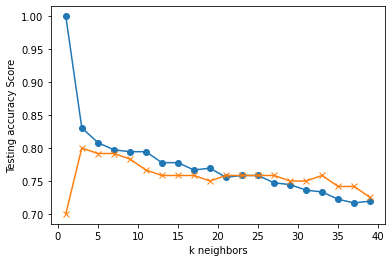

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
# Note that k: 3 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.800


## 2. KNN, took out Loan_Amount_Term

In [16]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.708
k: 3, Train/Test Score: 0.836/0.800
k: 5, Train/Test Score: 0.811/0.800
k: 7, Train/Test Score: 0.797/0.783
k: 9, Train/Test Score: 0.794/0.783
k: 11, Train/Test Score: 0.794/0.767
k: 13, Train/Test Score: 0.800/0.767
k: 15, Train/Test Score: 0.803/0.775
k: 17, Train/Test Score: 0.786/0.758
k: 19, Train/Test Score: 0.786/0.758
k: 21, Train/Test Score: 0.781/0.758
k: 23, Train/Test Score: 0.772/0.758
k: 25, Train/Test Score: 0.769/0.758
k: 27, Train/Test Score: 0.772/0.758
k: 29, Train/Test Score: 0.772/0.758
k: 31, Train/Test Score: 0.761/0.750
k: 33, Train/Test Score: 0.756/0.750
k: 35, Train/Test Score: 0.742/0.750
k: 37, Train/Test Score: 0.739/0.750
k: 39, Train/Test Score: 0.733/0.750


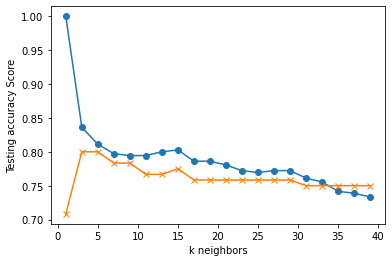

In [18]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.792


## 3. KNN, took out Loan_Amount_Term and LoanAmount

In [20]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.997/0.692
k: 3, Train/Test Score: 0.839/0.775
k: 5, Train/Test Score: 0.808/0.783
k: 7, Train/Test Score: 0.797/0.792
k: 9, Train/Test Score: 0.803/0.792
k: 11, Train/Test Score: 0.794/0.783
k: 13, Train/Test Score: 0.797/0.783
k: 15, Train/Test Score: 0.789/0.775
k: 17, Train/Test Score: 0.792/0.775
k: 19, Train/Test Score: 0.783/0.767
k: 21, Train/Test Score: 0.778/0.758
k: 23, Train/Test Score: 0.775/0.758
k: 25, Train/Test Score: 0.772/0.758
k: 27, Train/Test Score: 0.772/0.758
k: 29, Train/Test Score: 0.775/0.758
k: 31, Train/Test Score: 0.767/0.742
k: 33, Train/Test Score: 0.758/0.742
k: 35, Train/Test Score: 0.761/0.742
k: 37, Train/Test Score: 0.744/0.750
k: 39, Train/Test Score: 0.742/0.742


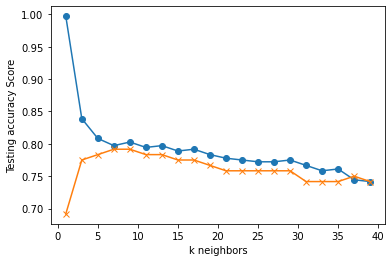

In [22]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.792


## 4. KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests

In [24]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 	'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 	'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.997/0.600
k: 3, Train/Test Score: 0.853/0.725
k: 5, Train/Test Score: 0.828/0.742
k: 7, Train/Test Score: 0.814/0.750
k: 9, Train/Test Score: 0.819/0.767
k: 11, Train/Test Score: 0.814/0.767
k: 13, Train/Test Score: 0.803/0.783
k: 15, Train/Test Score: 0.808/0.792
k: 17, Train/Test Score: 0.808/0.792
k: 19, Train/Test Score: 0.811/0.792
k: 21, Train/Test Score: 0.811/0.783
k: 23, Train/Test Score: 0.811/0.792
k: 25, Train/Test Score: 0.811/0.792
k: 27, Train/Test Score: 0.811/0.792
k: 29, Train/Test Score: 0.811/0.792
k: 31, Train/Test Score: 0.814/0.792
k: 33, Train/Test Score: 0.814/0.792
k: 35, Train/Test Score: 0.814/0.792
k: 37, Train/Test Score: 0.811/0.783
k: 39, Train/Test Score: 0.808/0.783


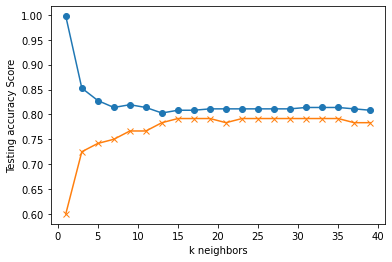

In [26]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.758


## 5. KNN, weights = distance, all factors...???

weights='distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [28]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.24549836, -0.51318299, -0.58926585, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.30100616,  0.22454126, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.46545932,  0.82555875, ...,  1.52752523,
        -0.78842985, -0.68074565],
       ...,
       [ 0.24688052,  0.81405076,  0.86328741, ..., -0.65465367,
        -0.78842985,  1.46897745],
       [-0.75173732, -0.2070099 ,  0.28075696, ..., -0.65465367,
         1.26834366, -0.68074565],
       [ 1.24549836,  0.07594628, -0.58926585, ..., -0.65465367,
         1.26834366, -0.68074565]])

k: 1, Train/Test Score: 1.000/0.700
k: 3, Train/Test Score: 1.000/0.767
k: 5, Train/Test Score: 1.000/0.783
k: 7, Train/Test Score: 1.000/0.792
k: 9, Train/Test Score: 1.000/0.775
k: 11, Train/Test Score: 1.000/0.775
k: 13, Train/Test Score: 1.000/0.775
k: 15, Train/Test Score: 1.000/0.775
k: 17, Train/Test Score: 1.000/0.775
k: 19, Train/Test Score: 1.000/0.767
k: 21, Train/Test Score: 1.000/0.775
k: 23, Train/Test Score: 1.000/0.767
k: 25, Train/Test Score: 1.000/0.767
k: 27, Train/Test Score: 1.000/0.767
k: 29, Train/Test Score: 1.000/0.767
k: 31, Train/Test Score: 1.000/0.758
k: 33, Train/Test Score: 1.000/0.758
k: 35, Train/Test Score: 1.000/0.758
k: 37, Train/Test Score: 1.000/0.767
k: 39, Train/Test Score: 1.000/0.750


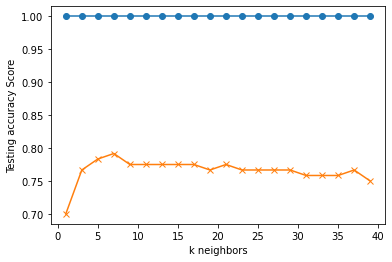

In [30]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

#?? Something has to be done differently...